In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def sex_no(x):
    if x=='male':
#         print(1)
        return 1
    elif x=='female':
#         print(0)
        return 0

In [5]:
data['Male_Female'] = data['Sex'].apply(sex_no)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set()

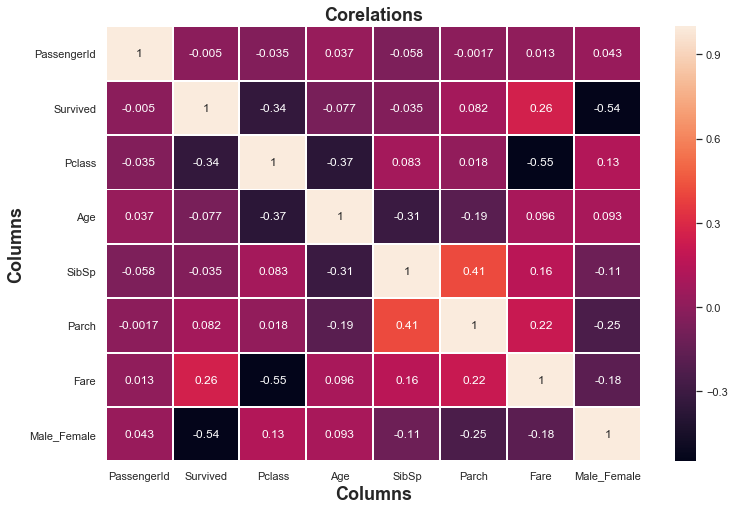

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='w')
plt.title('Corelations',fontsize=18,weight='bold')
plt.xlabel('Columns',fontsize=18,weight='bold')
plt.ylabel('Columns',fontsize=18,weight='bold')
plt.savefig('Correlation.png',bbox_inches='tight')

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Male_Female      int64
dtype: object

In [10]:
numerical_data = data[['PassengerId','Pclass','Fare','Male_Female']].copy()

In [11]:
survival_data = data['Survived'].copy()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X,x_test,Y,y_test = train_test_split(numerical_data,
                                    survival_data,
                                    test_size = 0.3,
                                    random_state= 5)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X,Y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Coefficients

In [17]:
coefficients = model.coef_

In [18]:
coefficients

array([[ 1.40769950e-04, -8.17832763e-01,  9.13837960e-04,
        -2.46170432e+00]])

In [19]:
coeff_dict = {
    'PassengerId':coefficients[0][0],
    'Pclass':coefficients[0][1],
    'Fare':coefficients[0][2],
    'Sex':coefficients[0,3]
}

In [20]:
coeff_dict  = pd.Series(coeff_dict)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

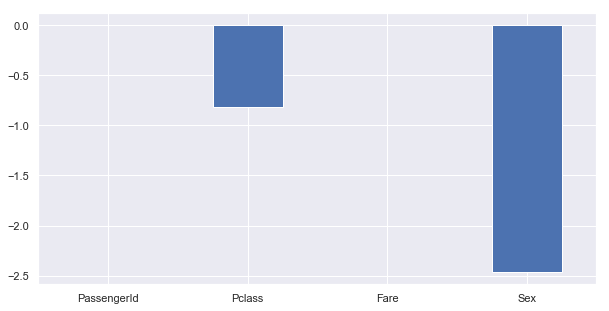

In [21]:
plt.figure(figsize=(10,5))
coeff_dict.plot(kind='bar')
plt.xticks(rotation=0)


## Cross validation 

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
x1 = numerical_data
y1 = survival_data

In [24]:
model1 = LogisticRegression()

In [25]:
lin_score = cross_val_score(model1,x1,y1,cv=5,scoring='accuracy')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [26]:
lin_score

array([0.74301676, 0.80446927, 0.76966292, 0.75842697, 0.79096045])

In [27]:
lin_score.mean()

0.7733072746274807

## visualization of male_female

In [28]:
male_female_data = data.groupby('Male_Female')['Survived'].value_counts()

In [29]:
male_female_data

Male_Female  Survived
0            1           233
             0            81
1            0           468
             1           109
Name: Survived, dtype: int64

In [30]:
male_female_data = male_female_data.groupby(level=0).apply(lambda x : x*100/x.sum())

In [31]:
male_female_data

Male_Female  Survived
0            1           74.203822
             0           25.796178
1            0           81.109185
             1           18.890815
Name: Survived, dtype: float64

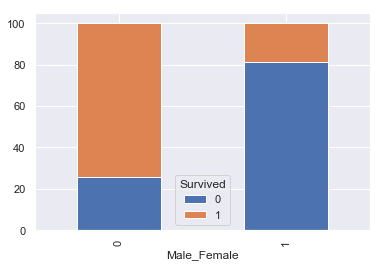

In [32]:
male_female_data.unstack().plot(kind='bar',stacked=True)

In [33]:
## Prediction on x_test

In [34]:
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [36]:
confusion = confusion_matrix(predictions,y_test)

In [37]:
confusion

array([[148,  35],
       [ 19,  66]], dtype=int64)

In [38]:
score = accuracy_score(predictions,y_test)

In [39]:
score

0.7985074626865671

## another model with decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_model = DecisionTreeClassifier()

In [42]:
dt_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
dt_predictions = dt_model.predict(x_test)

In [44]:
dt_score = accuracy_score(dt_predictions,y_test)

In [45]:
dt_score

0.75

## knn model 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn_model = KNeighborsClassifier()

In [48]:
knn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
knn_prediction = knn_model.predict(x_test)

In [50]:
knn_score = accuracy_score(knn_prediction,y_test)

In [51]:
knn_score

0.6007462686567164

## Voting Classifier

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [54]:
voting_model = VotingClassifier(estimators =[
    ('dt',dt),
    ('knn',knn),
    ('lg',lg)],voting='hard')


In [55]:
voting_model.fit(X,Y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [56]:
voting_predictions = voting_model.predict(x_test)

In [57]:
voting_score = accuracy_score(voting_predictions,y_test)

In [58]:
voting_score

0.7574626865671642

## KNN with grid search

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_params = {
    'n_neighbors' : [3,5,6,19,20],
    'weights':['uniform','distance']
    }

In [61]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
#     verbose = 1,
    cv = 3,
    n_jobs=-1
    
    )

In [62]:
gs_result = gs.fit(X,Y)

In [63]:
gs_prediction = gs.predict(x_test)

In [64]:
gs_prediction[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [65]:
gs_score = accuracy_score(gs_prediction,y_test)

In [66]:
gs_score

0.667910447761194

In [67]:
gs_accuracy =gs_result.best_score_

In [68]:
gs_accuracy

0.6725521669341894

In [69]:
gs_result.best_params_

{'n_neighbors': 20, 'weights': 'uniform'}

## using above paramaters in KNN model 

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=20,weights='uniform')

In [71]:
knn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [72]:
knn_predict = knn_model.predict(x_test)

In [73]:
knn_accuracy = accuracy_score(knn_predict,y_test)

In [74]:
knn_accuracy

0.667910447761194

## importing the test data

In [75]:
test_data = pd.read_csv('test.csv')

In [76]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test_data['Male_Female'] = test_data['Sex'].apply(sex_no)

In [78]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_Female
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [79]:
test_data = test_data[['PassengerId','Pclass','Fare','Male_Female']].copy()

In [80]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
Male_Female    0
dtype: int64

In [81]:
test_data['Fare'] = test_data['Fare'].fillna(10)

In [82]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
Male_Female    0
dtype: int64

In [83]:
test_predictions = model.predict(test_data)

In [84]:
test_predictions[:3]

array([0, 1, 0], dtype=int64)

In [85]:
test_predictions_df = {
    'PassengerId':test_data['PassengerId'],
    'Survived':test_predictions
}

In [86]:
test_predictions_df = pd.DataFrame(test_predictions_df)

In [87]:
test_predictions_df.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [88]:
test_predictions_df = test_predictions_df.set_index('PassengerId')

In [89]:
test_predictions_df.to_csv('submission.csv')